### **Assignment 1**

##### **Submission Instructions**
  Please complete each question below directly in this notebook. Note that you can write in the cells to describe what you are doing and any issues you face.

  1. **Ensure all code cells are executed**, and outputs are visible.

  2. Convert the notebook to **PDF** format including all outputs.
        - If using Jupyter Notebook: `File` → `Download as` → `PDF via LaTeX`.
        - Alternatively, use the command:
          ```bash
          jupyter nbconvert --to pdf assignment1.ipynb
          ```
          
  3. Submit **both `.ipynb` and `.pdf` files**.

  4. Ensure the notebook has proper **Markdown explanations and comments**.

  5. The submission deadline is **23:59 PM, Feb-27-2025 (Thursday)**. Any submission after deadline will received point deduction.

In [1]:
import math

##### **Question 1**
Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement representation for negative numbers. The function signature is

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [2]:
def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
    # Convert binary array to integer
    value = sum(bits[i] * (2 ** (w - 1 - i)) for i in range(w))
    # If the number is negative (two's complement)
    if bits[0] == 1:
        value -= 2 ** w
    # Convert to real number by scaling with 2^b
    return value / (2 ** b)

# Test Examples:
print(fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]))  
print(fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1]))  
print(fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1]))  

44.75
-13.28125
-21.25


##### **Question 2**

Manually calculate the prices of the following options step by step using two-step Cox Rox Rubinstein (CRR) Binomial tree

 a. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
 b. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
 c. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
 d. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
Question: Calculate the value of the portfolio that is

+    Buying the call option from part (a) and selling the put option from part (b)
  
+    Buying the call option from part (c) and selling the put option from part (d)
    

#### Define the Parameters

In [3]:
# Parameters
S = 100    
K = 105    
r = 0.03   
T = 1      
sigma1 = 0.2  
sigma2 = 0.1   
n = 2      # Number of time steps

In [ ]:
# Define payoff functions
def call_payoff(S_T, K):
    return max(S_T - K, 0)

def put_payoff(S_T, K):
    return max(K - S_T, 0)

# Define binomial tree option pricing function
def binomial_tree_option_price(S, K, r, T, sigma, n, option_type='call'):
    # Set up parameters
    dt = T / n
    b = math.exp(sigma * sigma * dt + r * dt) + math.exp(-r * dt)
    u = (b + math.sqrt(b * b - 4)) / 2
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    
    # Build stock price tree
    stock_tree = []
    for i in range(n + 1):
        prices = []
        for j in range(i + 1):
            price = S * (u ** (i - j)) * (d ** j)  # Directly compute each node
            prices.append(price)
        stock_tree.append(prices)
    
    # Build option price tree
    option_tree = [[0] * (i + 1) for i in range(n + 1)]
    
    # Terminal payoff
    for j in range(n + 1):
        S_T = stock_tree[-1][j]
        if option_type == 'call':
            option_tree[-1][j] = call_payoff(S_T, K)
        else:
            option_tree[-1][j] = put_payoff(S_T, K)
    
    # Backward induction
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_tree[i][j] = math.exp(-r * dt) * (p * option_tree[i + 1][j] + (1 - p) * option_tree[i + 1][j + 1])
    
    return option_tree[0][0]

#### # Calculate call and put option prices and Portfolio prices

In [5]:
#call and put option prices
call_option_price_a = binomial_tree_option_price(S, K, r, T, sigma1, n, option_type='call')
put_option_price_b = binomial_tree_option_price(S, K, r, T, sigma1, n, option_type='put')

call_option_price_c = binomial_tree_option_price(S, K, r, T, sigma2, n, option_type='call')
put_option_price_d = binomial_tree_option_price(S, K, r, T, sigma2, n, option_type='put')

# Portfolio prices
portfolio_price_1 = call_option_price_a - put_option_price_b
portfolio_price_2 = call_option_price_c - put_option_price_d

# Print the results
print(f"(a) Call Option Price: {call_option_price_a:.2f}")
print(f"(b) Put Option Price: {put_option_price_b:.2f}")
print(f"(c) Call Option Price: {call_option_price_c:.2f}")
print(f"(d) Put Option Price : {put_option_price_d:.2f}")
print(f"Portfolio Price 1: {portfolio_price_1:.2f}")
print(f"Portfolio Price 2: {portfolio_price_2:.2f}")


(a) Call Option Price: 7.33
(b) Put Option Price: 9.23
(c) Call Option Price: 3.56
(d) Put Option Price : 5.45
Portfolio Price 1: -1.90
Portfolio Price 2: -1.90


##### **Question 3**
Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks (risk sensitivities) are:
  * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
  * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
  * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
  * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
  * Rho $\rho$: the rate of change in the price of an option in response to a change in the interest rate.

  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:
     $$
    \begin{aligned}
        & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
        & \Gamma = \frac{\partial^2 V}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
        & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma }, ~~~\Delta \sigma = 0.1\% \\
        & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t}, ~~~\Delta t = 0.004 \\
        & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}, ~~~\Delta r = 0.0001
    \end{aligned}
    $$

  *Objective*: Implement a Greeks calculater for binomial tree pricer provided below. 
  
  *Signature*: The definition  of the greeks calculator is
  
  ```python
  def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      """
      Computes the specified Greek for a European option using a binomial tree.

      Parameters:
      S (float)  : Current stock price
      r (float)  : Risk-free interest rate
      vol (float): Volatility of the underlying asset
      T (float)  : Time to maturity (in years)
      strike (float): Strike price of the option
      greekType (str): The type of Greek to compute ('Delta', 'Gamma', 'Theta', 'Vega', or 'Rho')

      Returns:
      float: The computed Greek value.
      """
  ```
  *Visualization and Analysis*: 
  
  +   Setting $S = 100, r = 0.03, vol = 0.2$
  +   Vary the strike price from 50 to 150.
  +   Plot each greeks as a function of strike for 1 year European call option.
  +   Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [6]:
from enum import Enum

class PayoffType(Enum):
    Call = 1  
    Put = 2 

In [7]:
# binomial pricer for exercise 3
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

In [ ]:
def binomialGreeks(S, r, vol, T, strike, greekType) -> float:
    # set number of time steps in the binomial tree
    n = 300
    # Define the European option instance
    option = EuropeanOption(T, strike, PayoffType.Call)
    
    # Define small changes in the parameters
    deltaS = 0.001 * S
    deltaVol = 0.001 
    deltaT = 0.004
    deltaR = 0.0001

    # Calculate the Greek based on the greekType
    if greekType == 'Delta':
        V_plus = binomialPricer(S + deltaS, r, vol, option, n, crrCalib)
        V_minus = binomialPricer(S - deltaS, r, vol, option, n, crrCalib)
        return (V_plus - V_minus) / (2 * deltaS)

    elif greekType == 'Gamma':
        V_plus = binomialPricer(S + deltaS, r, vol, option, n, crrCalib)
        V_minus = binomialPricer(S - deltaS, r, vol, option, n, crrCalib)
        V = binomialPricer(S, r, vol, option, n, crrCalib)
        return (V_plus - 2 * V + V_minus) / (deltaS ** 2)

    elif greekType == 'Vega':
        V_plus = binomialPricer(S, r, vol + deltaVol, option, n, crrCalib)
        V_minus = binomialPricer(S, r, vol - deltaVol, option, n, crrCalib)
        return (V_plus - V_minus) / (2 * deltaVol)

    elif greekType == 'Theta':
        option_new = EuropeanOption(T - deltaT, strike, PayoffType.Call)
        V_plus = binomialPricer(S, r, vol, option_new, n, crrCalib)
        V_minus = binomialPricer(S, r, vol, option, n, crrCalib)
        return (V_plus - V_minus) /  deltaT
    

    elif greekType == 'Rho':
        V_plus = binomialPricer(S, r + deltaR, vol, option, n, crrCalib)
        V_minus = binomialPricer(S, r - deltaR, vol, option, n, crrCalib)
        return (V_plus - V_minus) / (2 * deltaR)

    else:
        raise ValueError(f"Unsupported Greek type: {greekType}")


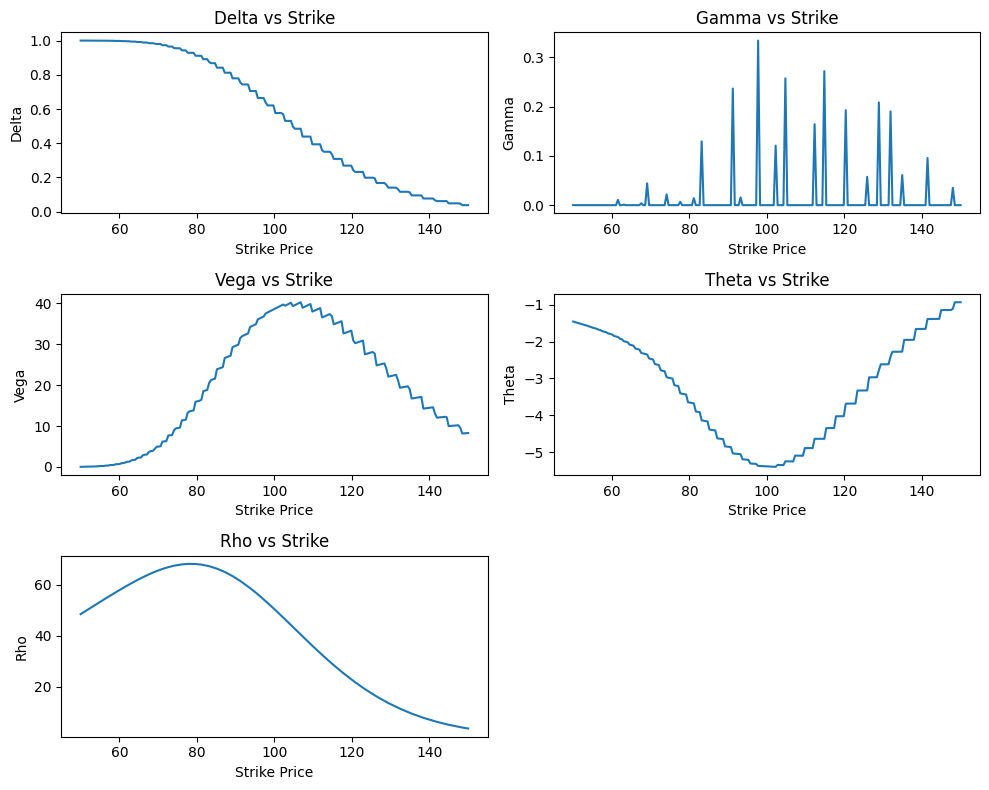

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
S = 100
r = 0.03
vol = 0.2
T = 1
strikes = np.linspace(50, 150, 200)

# Compute Greeks for each strike
delta_values = [binomialGreeks(S, r, vol, T, strike, "Delta") for strike in strikes]
gamma_values = [binomialGreeks(S, r, vol, T, strike, "Gamma") for strike in strikes]
vega_values = [binomialGreeks(S, r, vol, T, strike, "Vega") for strike in strikes]
theta_values = [binomialGreeks(S, r, vol, T, strike, "Theta") for strike in strikes]
rho_values = [binomialGreeks(S, r, vol, T, strike, "Rho") for strike in strikes]

# Plotting the Greeks
plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
plt.plot(strikes, delta_values, label="Delta")
plt.title("Delta vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Delta")

plt.subplot(3, 2, 2)
plt.plot(strikes, gamma_values, label="Gamma")
plt.title("Gamma vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Gamma")

plt.subplot(3, 2, 3)
plt.plot(strikes, vega_values, label="Vega")
plt.title("Vega vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Vega")

plt.subplot(3, 2, 4)
plt.plot(strikes, theta_values, label="Theta")
plt.title("Theta vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Theta")

plt.subplot(3, 2, 5)
plt.plot(strikes, rho_values, label="Rho")
plt.title("Rho vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Rho")

plt.tight_layout()
plt.show()
